In [1]:
import numpy
import pygad
import warnings
warnings.filterwarnings("ignore")
import pygad.nn
import pygad.gann
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

labelencoder = LabelEncoder()


In [2]:
data = pd.read_csv('databases/breast-cancer.data', names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                                                                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                                                'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                                                                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                                                                'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                                                                'fractal_dimension_se', 'radius_worst', 'texture_worst',
                                                                'perimeter_worst', 'area_worst', 'smoothness_worst',
                                                                'compactness_worst', 'concavity_worst', 'concave points_worst',
                                                                'symmetry_worst', 'fractal_dimension_worst'])

data = data.drop('id',axis=1)

data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:31]))
datas.columns = list(data.iloc[:,1:31].columns)
target = labelencoder.fit_transform(data['diagnosis'])
data = datas.values

In [3]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = numpy.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    last_fitness = ga_instance.best_solution()[1].copy()

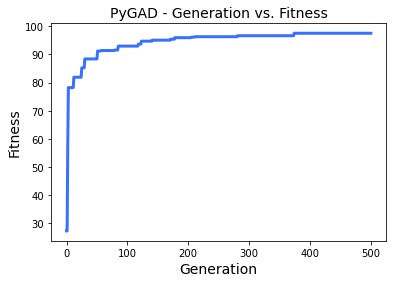

Parameters of the best solution : [ 0.6903377   0.23092094  0.34972624 ... -0.0970212  -0.37757608
  0.86270606]
Fitness value of the best solution = 97.53954305799648
Index of the best solution : 0
Best fitness value reached after 374 generations.
Predictions of the trained network : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [4]:
data_inputs, data_outputs = data, target

last_fitness = 0
# The length of the input vector for each sample (i.e. number of neurons in the input layer).
num_inputs = data_inputs.shape[1]
# The number of neurons in the output layer (i.e. number of classes).
num_classes = 3

num_solutions = 8 # A solution or a network can be used interchangeably.
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[100, 30],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu", "relu"],
                                output_activation="softmax")


population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# Initial population
initial_population = population_vectors.copy()

num_parents_mating = 4 # Number of solutions to be selected as parents in the mating pool.

num_generations = 500 # Number of generations.

mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists.

parent_selection_type = "sss" # Type of parent selection.

crossover_type = "single_point" # Type of the crossover operator.

mutation_type = "random" # Type of the mutation operator.

keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

    # After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                                   data_inputs=data_inputs)
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

    # Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))